In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading csv file
df = pd.read_csv(r"C:\Users\Rsc\movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Looking at null values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Finding missing values in column 'released'

df[df.released.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filling missing values in column 'released' with values in column 'year'

df['released'].where(df['released'].notnull(), df['year'], inplace = True)

In [7]:
# Validating column 'year' with reference to column 'released'

# Creating a function to extract year from column 'released'
import re
def Get_Year(string):
    list_num = re.findall('\d+', string)
    num = "".join([i for i in list_num if len(i)==4])
    return int(num)    

In [8]:
# Creating a new column 'get_year' based on year extracted from column 'released' 

df['get_year'] = df['released'].apply(lambda x: Get_Year(x) if type(x)==str else int(x))

In [9]:
# Looking at records where years are unmatched

df[df.year != df.get_year]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,get_year
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000.0,534816.0,Cattle Annie Productions,97.0,1981
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,NaN,5000000.0,Walt Disney Productions,84.0,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000.0,193457467.0,"""Weathering With You"" Film Partners",112.0,2020
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,682.0,Roxwell Films,93.0,2020
7584,"Faith, Hope & Love",PG,Comedy,2019,"February 4, 2020 (Australia)",6.2,719.0,J.J. Englert,Robert Krantz,Peta Murgatroyd,United States,NaN,210091.0,Ellinas Multimedia,106.0,2020
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000.0,226421.0,Emphatic Films,83.0,2020


In [10]:
# Correcting values in column 'year' with the help of column 'get_year'

df['year'] = df['get_year']

In [11]:
# Dropping column 'get_year'
df.drop('get_year', axis=1, inplace = True)

In [12]:
# Looking at duplicate records

df.duplicated().sum()

0

In [13]:
# Looking at Top 50 production companies with respect to total Gross collection

company_grp = df.groupby('company')    # Grouping df on 'company'

In [32]:
top50 = company_grp['gross'].sum().sort_values(ascending = False).head(50)
top50

company
Warner Bros.                       5.649142e+10
Universal Pictures                 5.251419e+10
Columbia Pictures                  4.300894e+10
Paramount Pictures                 4.049361e+10
Twentieth Century Fox              4.025705e+10
Walt Disney Pictures               3.632789e+10
New Line Cinema                    1.988380e+10
Marvel Studios                     1.506559e+10
DreamWorks Animation               1.187361e+10
Touchstone Pictures                1.179583e+10
Dreamworks Pictures                1.163544e+10
Metro-Goldwyn-Mayer (MGM)          9.230230e+09
Summit Entertainment               8.373719e+09
Pixar Animation Studios            7.886345e+09
Fox 2000 Pictures                  7.443503e+09
Lucasfilm                          7.185352e+09
Walt Disney Animation Studios      6.751509e+09
Lionsgate                          6.078453e+09
TriStar Pictures                   5.667436e+09
Screen Gems                        4.113025e+09
Miramax                         

In [33]:
# HYPOTHESIS 1 - Budget of a movie should be highly correlated with Gross of a movie.

# HYPOTHESIS 2 - Big companies (e.g. Warner Bros., Universal Pictures, Columbia Pictures, etc) should have high correlation
#                with Gross of movie produced. 


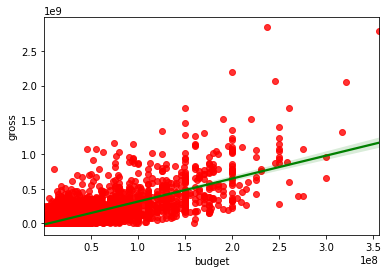

In [34]:
# Plotting Budget vs Gross using seaborn to get rough idea about correlation between Budget and gross

sns.regplot(x ='budget', y ='gross', data =df, scatter_kws ={'color':'red'}, line_kws ={'color':'green'})
plt.show()

In [ ]:
# Green line represent positive correlation between Budget and Gross

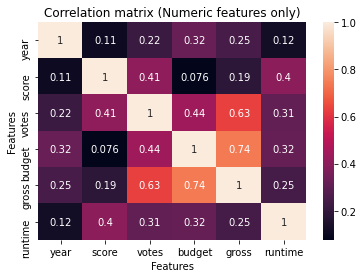

In [35]:
# Looking at correlation matrix for all numeric features using heatmap

sns.heatmap(df.corr(), annot = True)
plt.title("Correlation matrix (Numeric features only)")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [36]:
df.corr()['gross'].sort_values(ascending = False)   # Pearson method

gross      1.000000
budget     0.740395
votes      0.630757
year       0.250514
runtime    0.245216
score      0.186258
Name: gross, dtype: float64

In [ ]:
# HYPOTHESIS 1 is checked 

# Budget and Votes have high correlation with Gross (High correlation = corr > 0.5)

In [37]:
len(df.company.unique()) # Total production companies presneted in data

2386

In [38]:
top50_df = pd.DataFrame(top50)
top50_df.reset_index(inplace = True)
top50_df.rename({'gross':'collection'}, inplace = True, axis =1)

In [39]:
top50_df.head()

,company,collection
0,Warner Bros.,5.649142e+10
1,Universal Pictures,5.251419e+10
2,Columbia Pictures,4.300894e+10
3,Paramount Pictures,4.049361e+10
4,Twentieth Century Fox,4.025705e+10


In [40]:
df_OnlyTop50 = df.merge(top50_df['company'])
df_OnlyTop50

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
2,Private Benjamin,R,Comedy,1980,"October 10, 1980 (United States)",6.2,24000.0,Howard Zieff,Nancy Meyers,Goldie Hawn,United States,10000000.0,69847348.0,Warner Bros.,109.0
3,Bronco Billy,PG,Action,1980,"June 11, 1980 (United States)",6.1,11000.0,Clint Eastwood,Dennis Hackin,Clint Eastwood,United States,6500000.0,24265659.0,Warner Bros.,116.0
4,Just Tell Me What You Want,R,Comedy,1980,"January 18, 1980 (United States)",5.5,585.0,Sidney Lumet,Jay Presson Allen,Ali MacGraw,United States,NaN,2086905.0,Warner Bros.,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,The Greatest Showman,PG,Biography,2017,"December 20, 2017 (United States)",7.6,251000.0,Michael Gracey,Jenny Bicks,Hugh Jackman,United States,84000000.0,438006904.0,Bona Film Group,105.0
3389,A Dog's Way Home,PG,Adventure,2019,"January 11, 2019 (United States)",6.7,16000.0,Charles Martin Smith,W. Bruce Cameron,Ashley Judd,China,18000000.0,80708134.0,Bona Film Group,96.0
3390,The Bravest,PG-13,Action,2019,"August 9, 2019 (United States)",5.6,794.0,Tony Chan,Chao Wang,Xiaoming Huang,China,NaN,245179562.0,Bona Film Group,118.0
3391,The Captain,NaN,Action,2019,"September 30, 2019 (China)",6.2,1700.0,Andrew Lau,Yonggan Yu,Hanyu Zhang,China,NaN,417282021.0,Bona Film Group,111.0


In [41]:
df_OnlyTop50['company'] = df_OnlyTop50['company'].astype('category')

df_OnlyTop50['company'] = df_OnlyTop50['company'].cat.codes

In [42]:
df_OnlyTop50.corr()['gross'].sort_values(ascending = False)   # Pearson method

gross      1.000000
budget     0.732121
votes      0.626734
runtime    0.337359
year       0.336506
score      0.291654
company    0.067562
Name: gross, dtype: float64

In [ ]:
# There is almost no correlation between Company (top 50) and Gross (corr = 0.067)

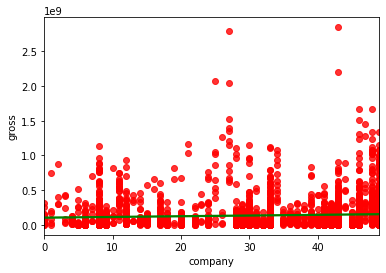

In [44]:
# Plotting Top50 companies against Gross using seaborn 

sns.regplot(x ='company', y ='gross', data =df_OnlyTop50, scatter_kws ={'color':'red'}, line_kws ={'color':'green'})
plt.show()

In [ ]:
# Green line representing correlation between Top 50 companies and Gross is almost flat.

# There is no correlation between them.

# HYPOTHESIS 2 is incorrect.